## EDA

In [25]:
train.describe().round(2)

,date,customer_code,age,first_contract_date,new_cust,seniority_in_months,primary_cust,active_cust,income,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct_1,pensions_2,direct_debt,total_products
count,7350704,7350704.00,7350704.00,7350704,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.0,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00,7350704.00
mean,2015-12-20 06:48:44.553838080,850982.41,40.10,2009-04-12 15:48:38.383001088,0.07,76.47,1.19,0.43,105591.01,0.00,0.0,0.62,0.00,0.08,0.01,0.01,0.12,0.04,0.00,0.00,0.04,0.08,0.02,0.01,0.01,0.00,0.05,0.04,0.02,0.00,0.05,0.06,0.12,1.37
min,2015-06-28 00:00:00,15889.00,2.00,1995-01-16 00:00:00,0.00,-999999.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015-09-28 00:00:00,464328.00,24.00,2004-07-06 00:00:00,0.00,22.00,1.00,0.00,39379.08,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2015-12-28 00:00:00,943521.00,39.00,2011-09-26 00:00:00,0.00,50.00,1.00,0.00,82630.77,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,2016-03-28 00:00:00,1220509.00,50.00,2013-11-22 00:00:00,0.00,133.00,1.00,1.00,136359.84,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
max,2016-05-28 00:00:00,1553687.00,164.00,2016-05-31 00:00:00,1.00,256.00,99.00,1.00,28894395.51,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,15.00
std,NaN,437214.98,17.23,NaN,0.26,1381.78,4.36,0.50,213815.28,0.01,0.0,0.49,0.02,0.27,0.09,0.09,0.32,0.19,0.04,0.04,0.19,0.27,0.13,0.07,0.09,0.05,0.22,0.20,0.15,0.06,0.22,0.23,0.33,1.50


From the descriptive statistics table we can see:  
 - There are more man than women in the dataset  
 - The average and median age in the dataset is 40 years old
 - There is a good range of seniority in the dataset, ranging from 0 to 256 months, or 21.3 years
 - Most of the clients in the dataset have their primary residency and birth place in Spain  

 ### Counting values, percentage and product bought for variables on columns employee_index, country, primary_customer, residency_spain, and deceased

In [26]:
pd.set_option('display.max_rows', None)

count_col = ['employee_index', 'country', 'residency_spain', 'birth_spain', 'primary_cust']

for col in count_col:
    count = train[col].value_counts()
    percentage = (count/count.sum()*100).round(2)
    products_bought = train.groupby(col)['total_products'].sum()
    summary = pd.DataFrame({'Count': count, 'Percentage':percentage, 'Products Owned': products_bought})
    print(summary)

                  Count  Percentage  Products Owned
employee_index                                     
A                  1231        0.02            7549
B                  1811        0.02            6327
F                  1288        0.02            4825
N               7346369       99.94        10040153
S                     5        0.00              40
           Count  Percentage  Products Owned
country                                     
AD            55        0.00             150
AE           121        0.00             278
AL             7        0.00               7
AO            32        0.00             101
AR          2441        0.03            3469
AT           221        0.00             413
AU           224        0.00             436
BA            16        0.00               6
BE           750        0.01            1166
BG           237        0.00             190
BM             6        0.00              12
BO           780        0.01             700
BR    

Most of the dataset is composed of clients from Spain and non-employees.  
Even thought non-spanish and employees clients are the absolute minority in the database, it still can be an important factor for these specific clients when predicting which products they will buy  

### Analyzing column: Sex

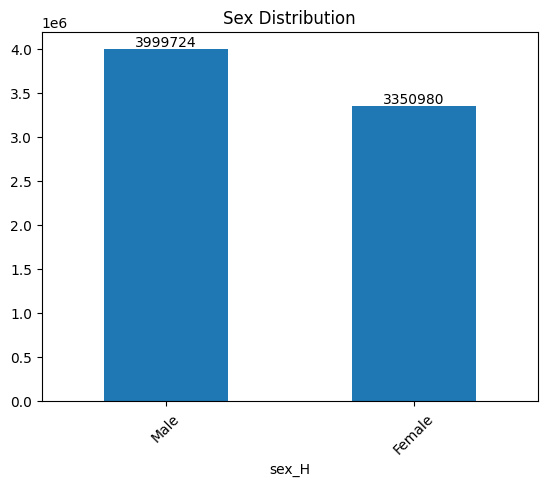

In [27]:
sex_plot = train['sex_H'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')
plt.xticks(ticks=[0,1], labels=['Male', 'Female'], rotation=45)
plt.bar_label(sex_plot.containers[0], fmt=int)
plt.show()

In [28]:
# Defining function to plot column data and see product purchasing behavior
def plot_grouped_data(df, group_col, products, colormap='rainbow', title='Grouped Data', show_legend=True):
    dummy = df.groupby(group_col)[products].sum()
    dummy = (dummy/dummy.sum()).T
    ax = dummy.plot(kind='bar', stacked=True, colormap=colormap, figsize=(10,4))
    ax.set_title(title)

    if show_legend:
        plt.legend(loc='center left', title='Legend', bbox_to_anchor=(1, .4))
    else:
        plt.legend().set_visible(False)


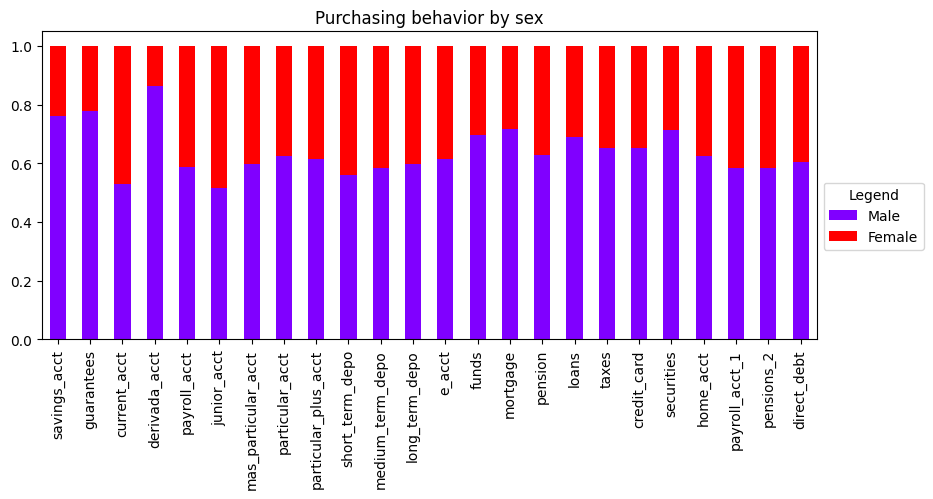

In [29]:
plot_grouped_data(train, 'sex_H', products, title='Purchasing behavior by sex', show_legend=True)
plt.legend(labels=('Male', 'Female'),loc='center left', title='Legend', bbox_to_anchor=(1, .4))
plt.show()

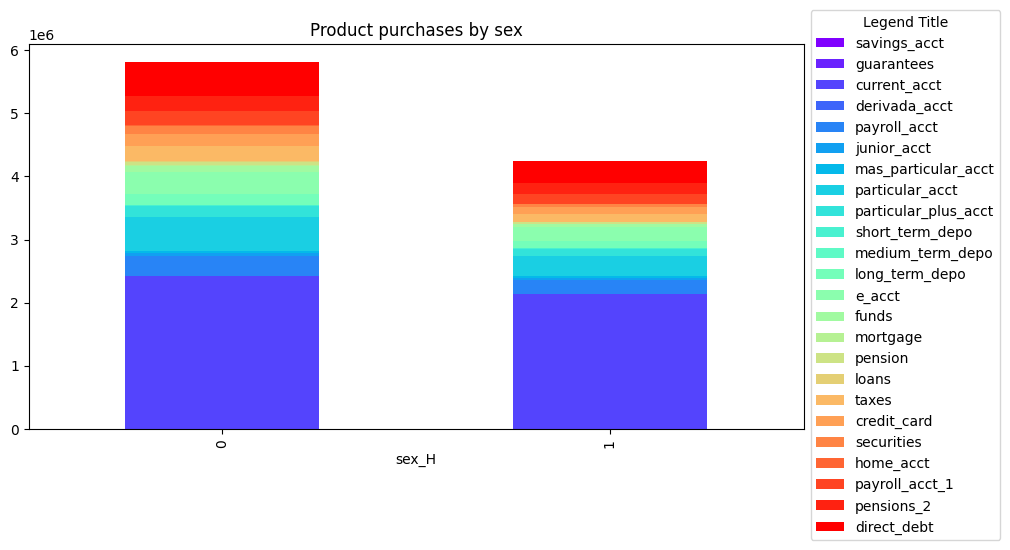

In [30]:
dummy = train[['sex_H']+products].groupby('sex_H').sum()
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(10,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Product purchases by sex')
plt.show()

In [31]:
dummy

,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct_1,pensions_2,direct_debt
sex_H,,,,,,,,,,,,,,,,,,,,,,,,
0,497,102,2414549,2336,329115,32881,39151,539598,177024,5383,6139,171891,351989,87573,28171,38962,11678,238128,196392,124336,16052,220587,241036,535761
1,156,29,2136189,370,230233,30972,26250,322787,111320,4250,4356,115044,221638,38402,11019,22917,5242,126293,104106,50063,9589,157492,171607,349239


- We can see that the bank has more male customers and they have bought more products than female customers
- Male customers have bought most of the products, showing a skewed distribution in the total products bought
- All the products, except derivada account show a relative similar ratio to the amount of male anad female customers, showing that it there may not be a product preference when it comes to gender, and the difference comes from the number of customers  

### Analyzing column: Age

In [32]:
age_sex = train.groupby('sex_H')['age'].size()

C:\Users\MARIA\AppData\Local\Temp\ipykernel_6872\2932124040.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = train.groupby(['age_group', 'sex_H']).size().unstack(fill_value=0)


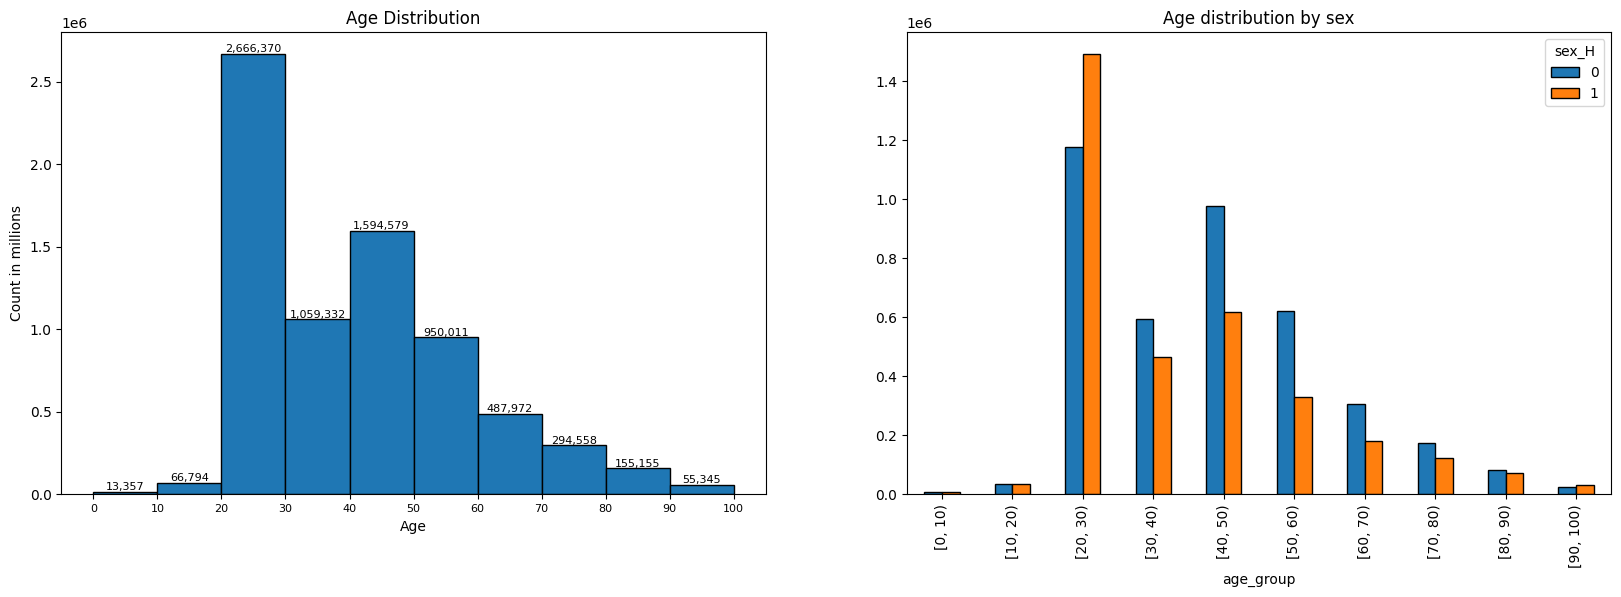

In [33]:
bin_edges = np.arange(0, 101, 10)
labels = [f'{i}-{i+19}' for i in bin_edges[:-1]]

# Create age groups
train['age_group'] = pd.cut(train['age'], bins=bin_edges, right=False)
age_sex_counts = train.groupby(['age_group', 'sex_H']).size().unstack(fill_value=0)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

#Age Distribution
bin_edges = np.arange(0, 101, 10)
values, bins, bars = plt.hist(train['age'], bins=bin_edges, edgecolor = 'black')
plt.title('Age Distribution')
plt.ylabel('Count in millions')
plt.xlabel('Age')
plt.xticks(bin_edges, fontsize=8)
plt.bar_label(bars, fmt='{:,.0f}', fontsize=8)

#Age distribution by sex
plt.subplot(1,2,2)
age_sex_counts.plot(kind='bar', stacked=False, edgecolor='black', ax=plt.gca())
plt.title('Age distribution by sex')

plt.show()

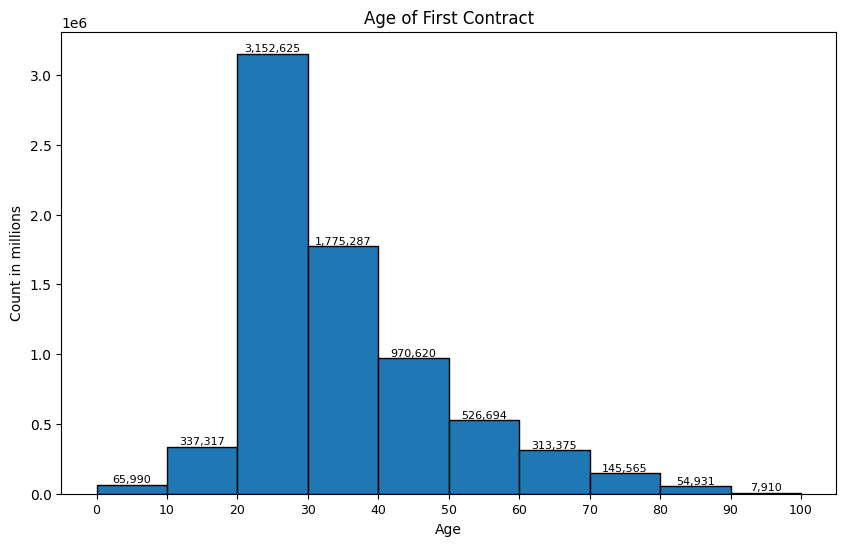

In [34]:
train['first_contract_age'] = train['age']-(train['seniority_in_months']/12).round()
test_set['first_contract_age'] = test_set['age']-(test_set['seniority_in_months']/12).round()
val_set['first_contract_age'] = val_set['age']-(val_set['seniority_in_months']/12).round()

bin_edges = np.arange(0, 101, 10)

plt.figure(figsize=(10,6))
values, bins, bars = plt.hist(train['first_contract_age'], bins=bin_edges, edgecolor = 'black')
plt.title('Age of First Contract')
plt.ylabel('Count in millions')
plt.xlabel('Age')
plt.xticks(bin_edges, fontsize=9)
plt.bar_label(bars, fmt='{:,.0f}', fontsize=8)
plt.show()

C:\Users\MARIA\AppData\Local\Temp\ipykernel_6872\2298204075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dummy = train.groupby('age_group')[products].sum()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values

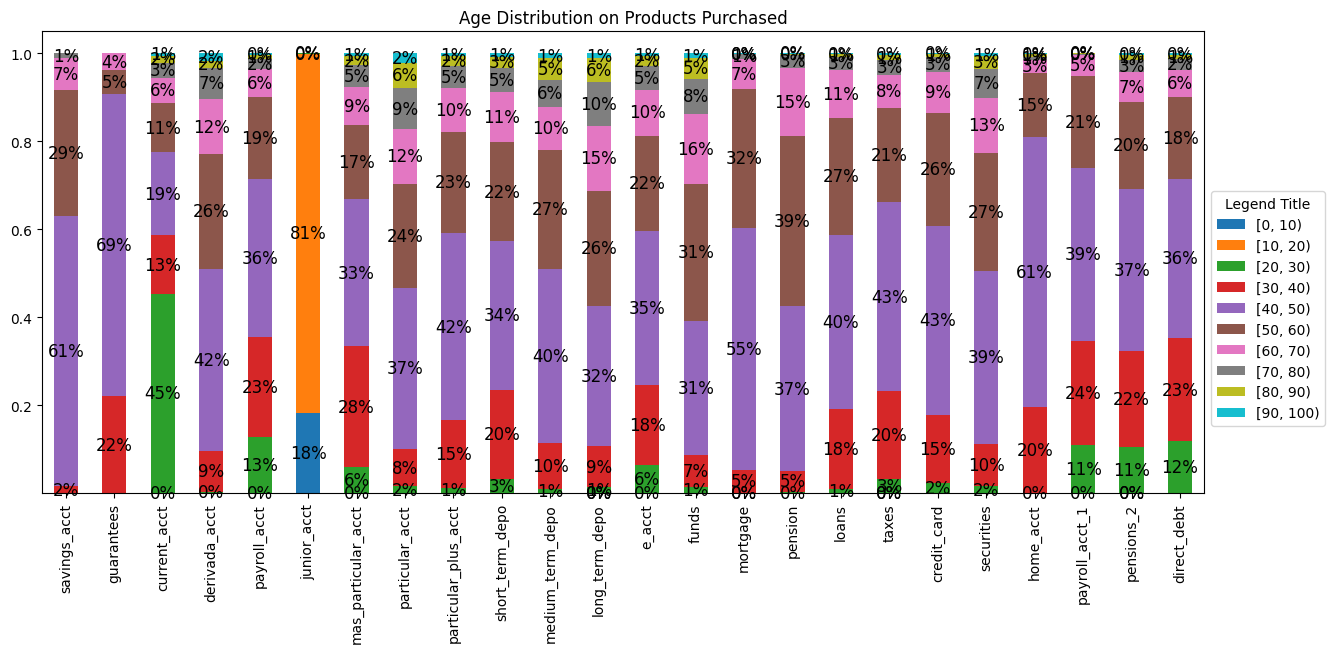

In [35]:
dummy = train.groupby('age_group')[products].sum()
dummy = (dummy/dummy.sum()).T
ax = dummy.plot(kind='bar', stacked=True, figsize=(15,6))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Age Distribution on Products Purchased')

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v*100:.0f}%' for v in container.datavalues], label_type='center', fontsize=12)

plt.show()

In [36]:
dummy*100

age_group,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
savings_acct,0.000000,0.000000,0.000000,1.684533,61.255743,28.637060,7.350689,1.071975,0.000000,0.000000
guarantees,0.000000,0.000000,0.000000,22.137405,68.702290,5.343511,3.816794,0.000000,0.000000,0.000000
current_acct,0.000308,0.146629,45.165336,13.313117,18.856746,11.248619,5.710774,3.355063,1.686185,0.517224
derivada_acct,0.000000,0.000000,0.406504,9.164819,41.537324,25.979305,12.490761,7.132299,1.515152,1.773836
payroll_acct,0.000000,0.000894,12.800506,22.824894,35.913078,18.572481,6.238446,2.465734,0.918638,0.265329
junior_acct,18.365621,81.419824,0.203593,0.010963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mas_particular_acct,0.000000,0.001529,5.898004,27.604557,33.360349,16.778041,8.792721,4.835232,2.110253,0.619313
particular_acct,0.000000,0.000116,1.631293,8.432069,36.683015,23.606139,12.407763,9.352581,5.743043,2.143981
particular_plus_acct,0.000000,0.000000,1.314570,15.400392,42.404262,23.107702,9.815551,5.029238,2.260242,0.668043
short_term_depo,0.000000,0.000000,3.218104,20.357106,33.738192,22.474826,11.439842,5.418873,2.647150,0.705907


- There are more male than female customers in all age groups, except 90-100
- There is a large number of young customers, in the 20-30 range and the second largest group of clients are on the 40-50 age range
- Most clients buy their first product when they are in the age group of 20-30
- There is a clear difference in the age group signed up for the junior account -predominantly with clients in the 10-20 age range
- There is a good amount of variety base on age group and products bough. Product dominance usually interchanges between age groups 40-50 and 50-60, followed by 30-40   

### Analyzing column: New Customers

new_cust
0    6802900
1     547804
Name: count, dtype: int64


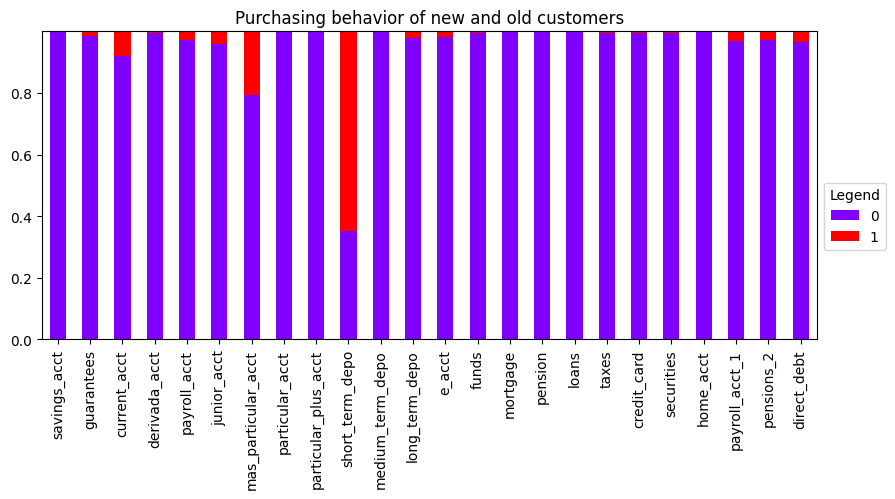

In [37]:
print(train['new_cust'].value_counts())

plot_grouped_data(train, 'new_cust', products, title='Purchasing behavior of new and old customers', show_legend=True)
plt.show()

- New customers purchase mostly short term deposits and mas particular account
- Very few participation on other products, meaning that few products offered by the bank are actually attracting new customers  

### Analyzing column: Seniority in Months

seniority_in_months
-999999        14
 0          94063
 1          92587
 2          89380
 3          89877
 4          83933
 5          88095
 6          79742
 7          78786
 8          75629
 9          73743
 10         84822
 11         67135
 12        104715
 13         77327
 14         80727
 15         77936
 16         79900
 17         78522
 18         75535
 19         69870
 20         69070
 21         81152
 22         72686
 23         77104
 24         80156
 25         70212
 26         73359
 27         69215
 28         68679
 29         66298
 30         64299
 31         61612
 32         58795
 33         66440
 34         61948
 35         63292
 36         72391
 37         64670
 38         66988
 39         63180
 40         66430
 41         64465
 42         59939
 43         65549
 44         63357
 45         66941
 46         63069
 47         58018
 48         61523
 49         56901
 50         57398
 51         52852
 52         56166
 53     

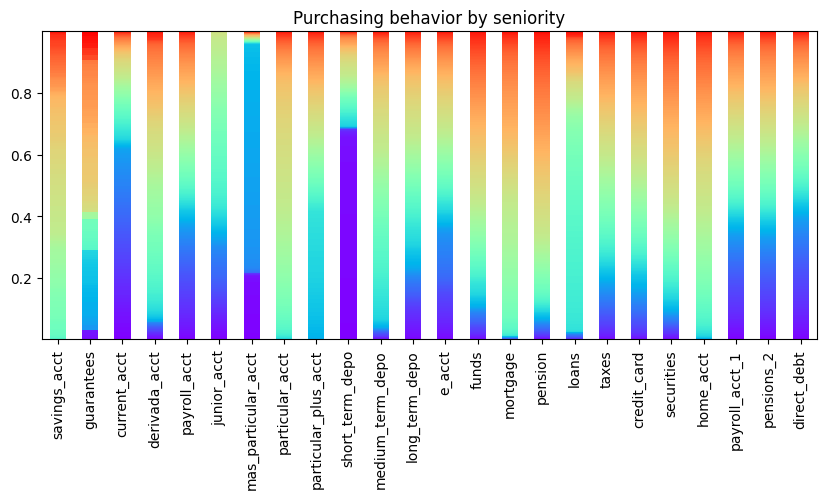

In [38]:
print(train['seniority_in_months'].value_counts().sort_index())

plot_grouped_data(train, 'seniority_in_months', products, title='Purchasing behavior by seniority', show_legend=False)
plt.show()

Cool colors indicate more recent clients and warm colors indicate higher seniority.  
For example: 0 months will be purple, converging to blue green, orange and finally red will be 256 months

- Current account, juniour account, mas account and short term account have the newest clients of the bank
- Oldest customers have bought savings, particular_plus account, mortgage, loans and home accounts  

### Analyzing column: Customer Type  
Correcting data type

In [39]:
train['cust_type'] = train['cust_type'].astype(str).str.strip()
test_set['cust_type'] = test_set['cust_type'].astype(str).str.strip()
val_set['cust_type'] = val_set['cust_type'].astype(str).str.strip()

train['cust_type'].unique()

array(['1', '1.0', '0', '3.0', '2', '3', 'P', '2.0', '4.0', '4'],
      dtype=object)

In [40]:
cust_type_map = {'0.0': '0', '1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4'}
train['cust_type'] = train['cust_type'].replace(cust_type_map)

test_set['cust_type'] = test_set['cust_type'].replace(cust_type_map)
val_set['cust_type'] = val_set['cust_type'].replace(cust_type_map)

train['cust_type'] = train['cust_type'].astype(object)

test_set['cust_type'] = test_set['cust_type'].astype(object)
val_set['cust_type'] = val_set['cust_type'].astype(object)

print(train['cust_type'].value_counts())
print(train['cust_relationship'].value_counts())

cust_type
1    7260501
0      85390
3       3040
2        917
P        627
4        229
Name: count, dtype: int64
cust_relationship
I    4084146
A    3177272
0      85390
P       3269
R        623
N          4
Name: count, dtype: int64


Same number of NA (0) for both relationship and customer type

In [41]:
na_rel = train[train['cust_type'] == '0']
na_rel[products].sum().sort_values(ascending=False)

current_acct            48358
mas_particular_acct       962
direct_debt               426
short_term_depo           377
payroll_acct              337
junior_acct               307
pensions_2                302
payroll_acct_1            297
long_term_depo            169
e_acct                     49
securities                 15
taxes                       6
funds                       5
credit_card                 2
pension                     1
derivada_acct               1
medium_term_depo            0
particular_plus_acct        0
guarantees                  0
mortgage                    0
loans                       0
home_acct                   0
particular_acct             0
savings_acct                0
dtype: int64

In [42]:
train['total_products'].groupby(train['cust_type']).sum()

cust_type
0       51614
1    10004498
2         424
3        1793
4         161
P         404
Name: total_products, dtype: int64

In [43]:
dummy = train.groupby('cust_type')[products].sum()
dummy = (dummy/dummy.sum()).T

print((dummy*100).round(2))

cust_type                0       1     2     3     4     P
savings_acct          0.00  100.00  0.00  0.00  0.00  0.00
guarantees            0.00  100.00  0.00  0.00  0.00  0.00
current_acct          1.06   98.89  0.00  0.03  0.00  0.01
derivada_acct         0.04   99.96  0.00  0.00  0.00  0.00
payroll_acct          0.06   99.93  0.00  0.01  0.00  0.00
junior_acct           0.48   99.51  0.00  0.00  0.00  0.00
mas_particular_acct   1.47   97.96  0.04  0.42  0.03  0.07
particular_acct       0.00  100.00  0.00  0.00  0.00  0.00
particular_plus_acct  0.00  100.00  0.00  0.00  0.00  0.00
short_term_depo       3.91   95.11  0.09  0.67  0.09  0.11
medium_term_depo      0.00  100.00  0.00  0.00  0.00  0.00
long_term_depo        0.06   99.90  0.03  0.01  0.00  0.00
e_acct                0.01   99.99  0.00  0.00  0.00  0.00
funds                 0.00   99.99  0.00  0.00  0.00  0.00
mortgage              0.00  100.00  0.00  0.00  0.00  0.00
pension               0.00   99.97  0.02  0.00  0.00  0.

- Customers with type and relationship missing have bought mostly current account, mas particular account and short term deposit. These are likely new customers
- Customers with type 2, 3 and P have bought mostly mas particular account and short term deposit accounts  

### Analyzing column: Join Channel

In [44]:
train['join_channel'].value_counts()

join_channel
KHE      2095903
KAT      1709503
KFC      1655057
KHQ       413265
KFA       213305
KHK       137531
KHM       128004
other     110709
KHN        79888
KHD        61353
KAS        45889
RED        41080
KAG        38692
KAY        36402
KAA        35588
KAB        33183
KAE        27195
KCC        25857
KHL        24952
KBZ        24655
KFD        24092
KAI        20258
KEY        18691
KAW        18073
KAR        17711
KAZ        17615
007        16861
KAF        15964
KCI        14619
013        13763
KAJ        13605
KCH        13494
KAH        13086
KHF        11475
KAQ         9796
KHC         9096
KAP         8306
KHO         6171
KAM         6106
KAD         5467
KEJ         5200
KGX         5179
KFP         5164
KGV         4788
KFT         4528
KDR         4437
KAL         4202
KBO         4072
KAC         4038
KBH         3920
KFS         3884
KFJ         3748
KAO         3715
KFG         3692
KES         3096
KFF         3026
KEW         2951
KCG         2815
K

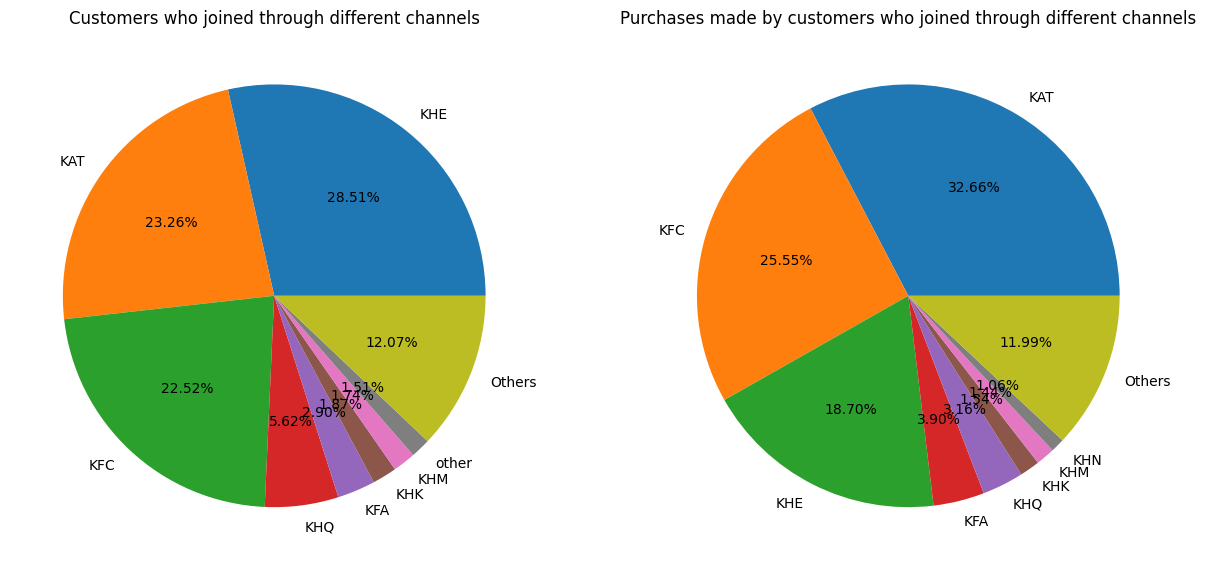

In [45]:
channel = train['join_channel'].value_counts()[:8]
others = train['join_channel'].value_counts()[8:]
dummy = train.groupby('join_channel')[products].sum().sum(axis=1)
dummy = dummy.sort_values(ascending=False)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(list(channel)+[others.sum()], labels=list(channel.index)+['Others'], autopct='%1.2f%%')
plt.title('Customers who joined through different channels')
plt.subplot(1,2,2)
plt.pie(list(dummy.values[:8])+[dummy.values[8:].sum()], labels = list(dummy.index[:8])+['Others'], autopct='%1.2f%%')
plt.title('Purchases made by customers who joined through different channels')
plt.show()

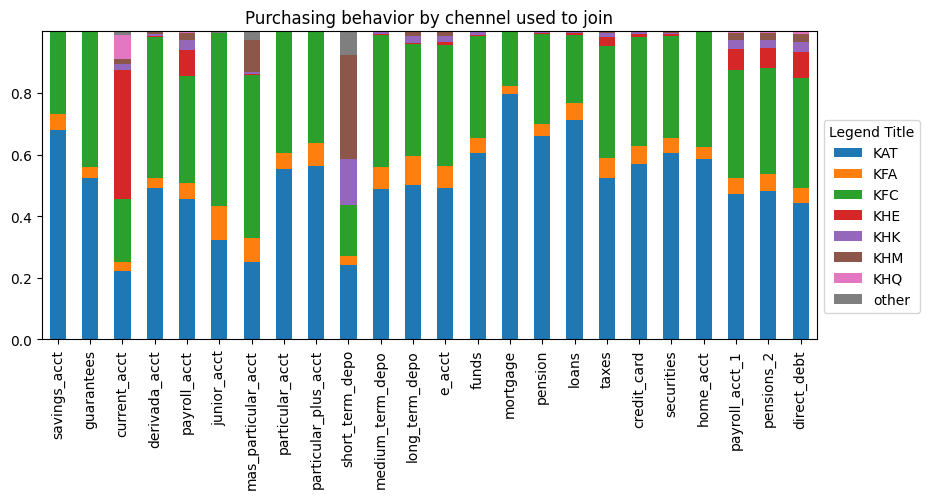

In [46]:
dummy = train.groupby('join_channel')[products].sum()
dummy = dummy[dummy.index.isin(channel.keys())]
dummy = (dummy/dummy.sum()).T
dummy.plot(kind='bar',stacked=True, figsize=(10,4))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Purchasing behavior by chennel used to join')
plt.show()

- The 8 top channels used to join the bank make up 88% of the total customers
- When we compare the number of purchases made by clients with to the channel they joined, 7 out of 8 channels are repeated on the number of clients who joined and number of purchases made, with the exception of "others" which were missing values
- Customers who joined through KAT have most purchases
- Customers who joined through KFC have more purchased than KAT on mas particular account and junior account  

### Analyzing column: Province Name

In [47]:
train['province_name'].value_counts().head(10)

province_name
MADRID       2374509
BARCELONA     703041
VALENCIA      374474
SEVILLA       321534
CORUÑA, A     229212
MURCIA        213652
MALAGA        194405
ZARAGOZA      184413
ALICANTE      171465
CADIZ         156627
Name: count, dtype: int64

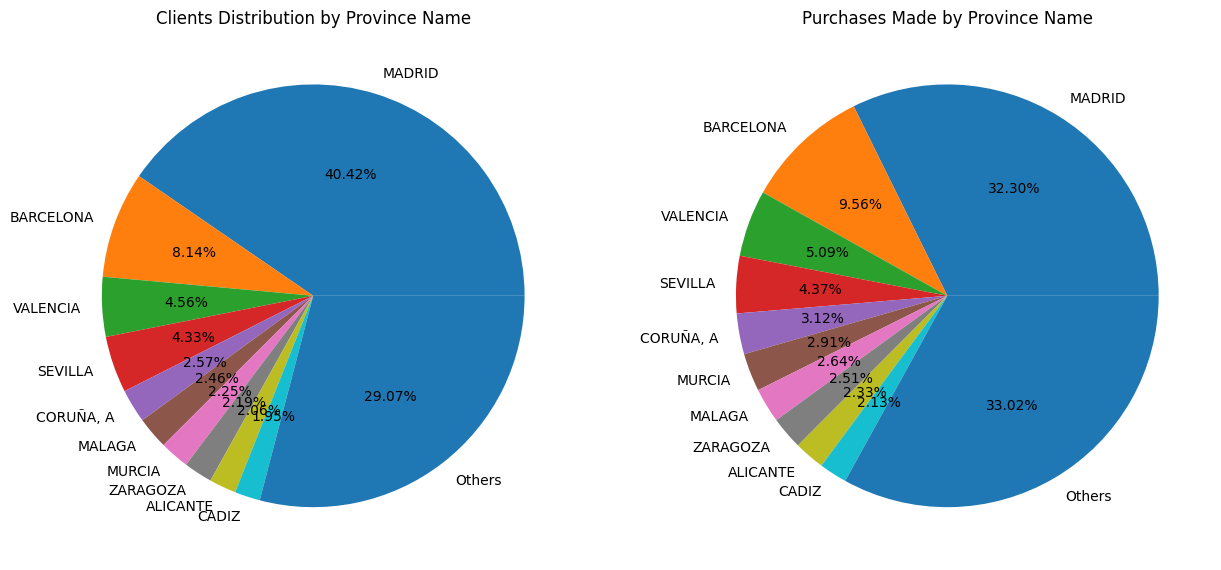

In [48]:
top_province = train['province_name'].value_counts()[:10]
province_others = train['province_name'].value_counts()[10:]
dummy = train.groupby('province_name')[products].sum().sum(axis=1)
dummy = dummy.sort_values(ascending=False)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(list(dummy.values[:10])+[dummy.values[10:].sum()], labels = list(dummy.index[:10])+['Others'], autopct='%1.2f%%')
plt.title('Clients Distribution by Province Name')
plt.subplot(1,2,2)
plt.pie(list(top_province)+[province_others.sum()], labels=list(top_province.index)+['Others'], autopct='%1.2f%%')
plt.title('Purchases Made by Province Name')
plt.show()

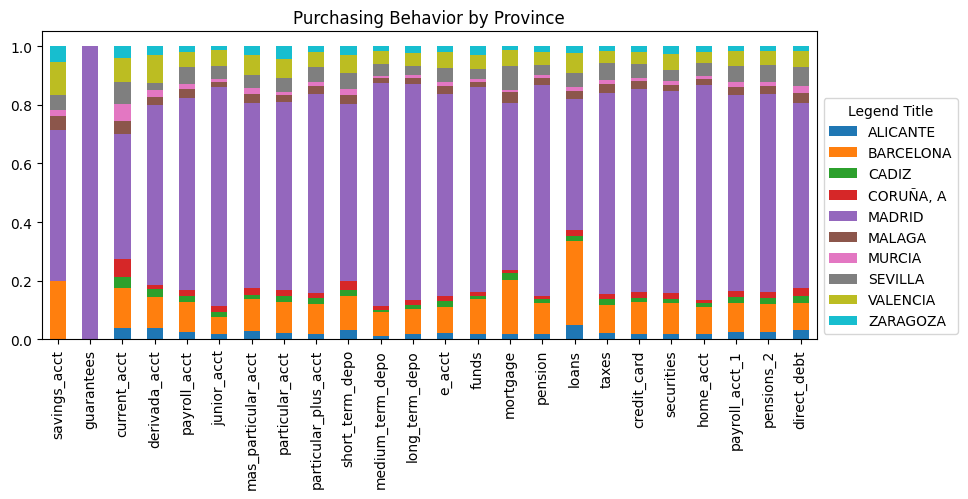

In [49]:
dummy = train.groupby('province_name')[products].sum()
dummy = dummy[dummy.index.isin(top_province.keys())]
dummy = (dummy/dummy.sum()).T
dummy.plot(kind='bar',stacked=True, figsize=(10,4))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Purchasing Behavior by Province')
plt.show()

- We can see most of the clients are from Madrid, Spain's capital, followed by other cities like Barcelona, Valencia and Sevilla
- The distribution of number products bought is quite similar to the number of clients from each city
- Guarantees account have only Madrid clients
- Clients from Barcelona buys mostly loans and savings account  

### Analyzing column: Active Customer

active_cust
0    4171818
1    3178886
Name: count, dtype: int64


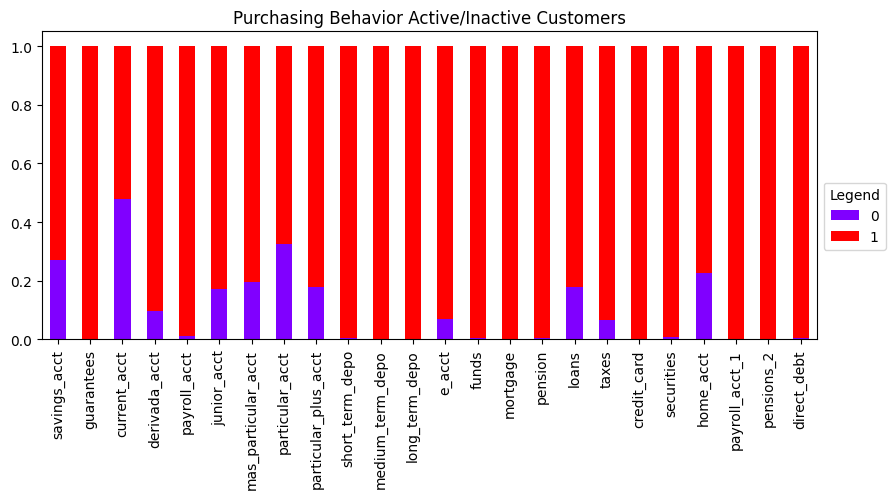

In [50]:
print(train['active_cust'].value_counts())

plot_grouped_data(train, 'active_cust', products, title='Purchasing Behavior Active/Inactive Customers', show_legend=True)
plt.show()

- There is a lot of inactive customers on the dataset, however all products have more active than inactive customers
- The three products with most inactive customers are savings, current and particular account  

### Analyzing column: Income

In [51]:
(train['income'] == 0).sum()

1566917

In [52]:
train.groupby('province_name')['income'].describe().round()

,count,mean,std,min,25%,50%,75%,max
province_name,,,,,,,,
ALAVA,20457.0,131.0,4213.0,0.0,0.0,0.0,0.0,253563.0
ALBACETE,61597.0,70692.0,45598.0,0.0,43643.0,72158.0,97240.0,764582.0
ALICANTE,171465.0,64526.0,142980.0,0.0,0.0,51896.0,86986.0,17804048.0
ALMERIA,32964.0,65368.0,57020.0,0.0,27816.0,61371.0,89659.0,578349.0
ASTURIAS,142752.0,75717.0,86326.0,0.0,0.0,73111.0,103932.0,4950059.0
AVILA,20854.0,60446.0,71181.0,0.0,33132.0,59390.0,82089.0,2768593.0
BADAJOZ,102555.0,56180.0,48798.0,0.0,23238.0,52291.0,79828.0,1103543.0
"BALEARS, ILLES",69624.0,94224.0,374586.0,0.0,0.0,63926.0,130273.0,15711716.0
BARCELONA,703041.0,137804.0,151217.0,0.0,67883.0,115102.0,173602.0,5752268.0


- Median income of the customers of all the products is almost same
- We can see gross house hold income of Ceuta is the highest

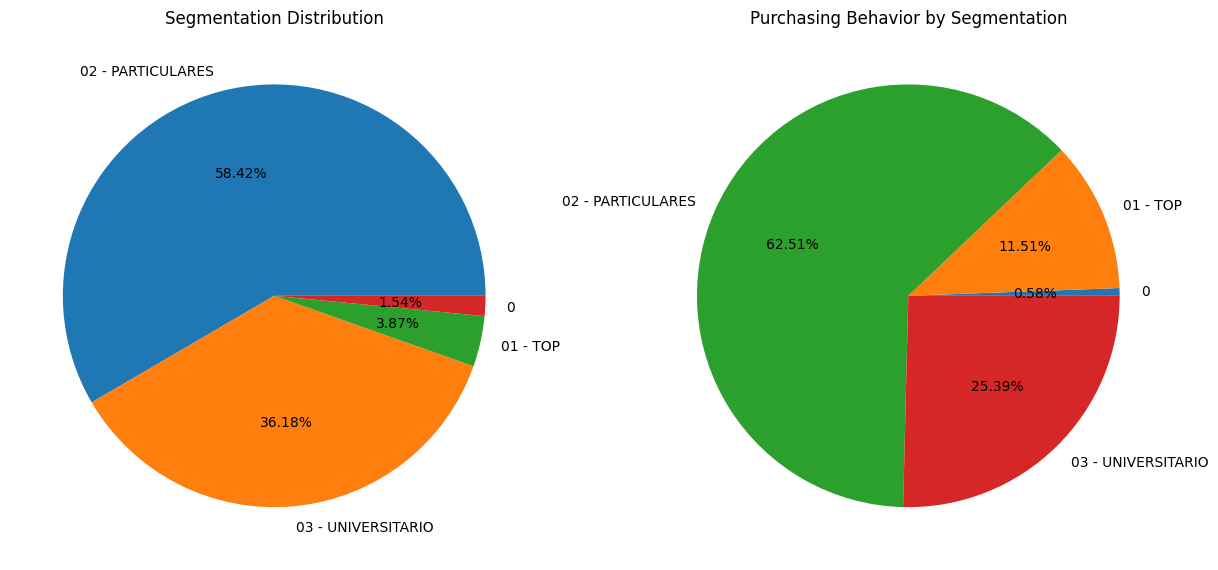

In [53]:
segmentation = train['segment'].value_counts()
seg_products = train.groupby('segment')['total_products'].sum()
seg_products = (seg_products/seg_products.sum())*100
seg_products

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(segmentation, labels=segmentation.keys(), autopct='%1.2f%%')
plt.title('Segmentation Distribution')
plt.subplot(1,2,2)
plt.pie(seg_products, labels=seg_products.index, autopct='%1.2f%%')
plt.title('Purchasing Behavior by Segmentation')
plt.show()

segment
02 - PARTICULARES     4293981
03 - UNIVERSITARIO    2659297
01 - TOP               284472
0                      112954
Name: count, dtype: int64


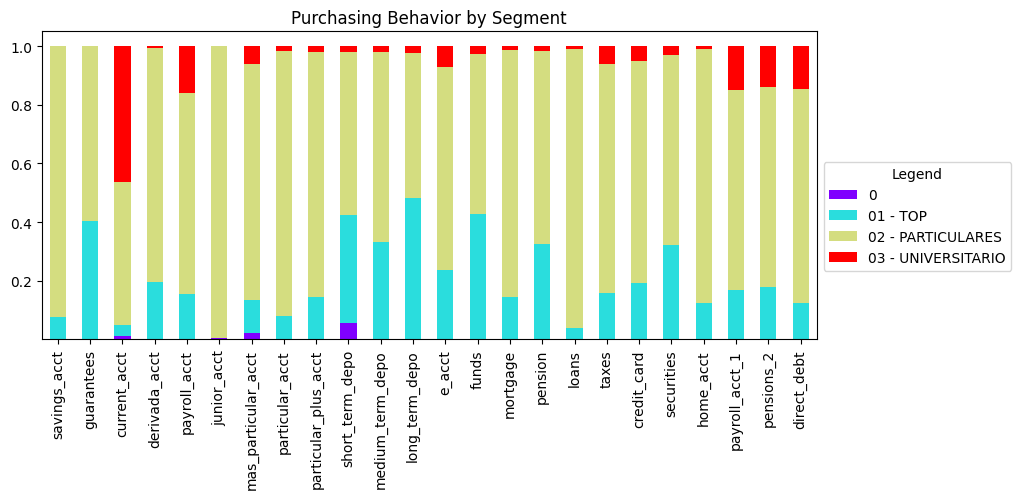

In [54]:
print(train['segment'].value_counts())

plot_grouped_data(train, 'segment', products, title='Purchasing Behavior by Segment', show_legend=True)
plt.show()

- Most customers are from segment #2 - Particulares
- The count of clients on each segment is corrrelated with the products the customers of that segments have bought
- All the customers who have bought juniour account belong to segment 02  

### Count of All Products Sold

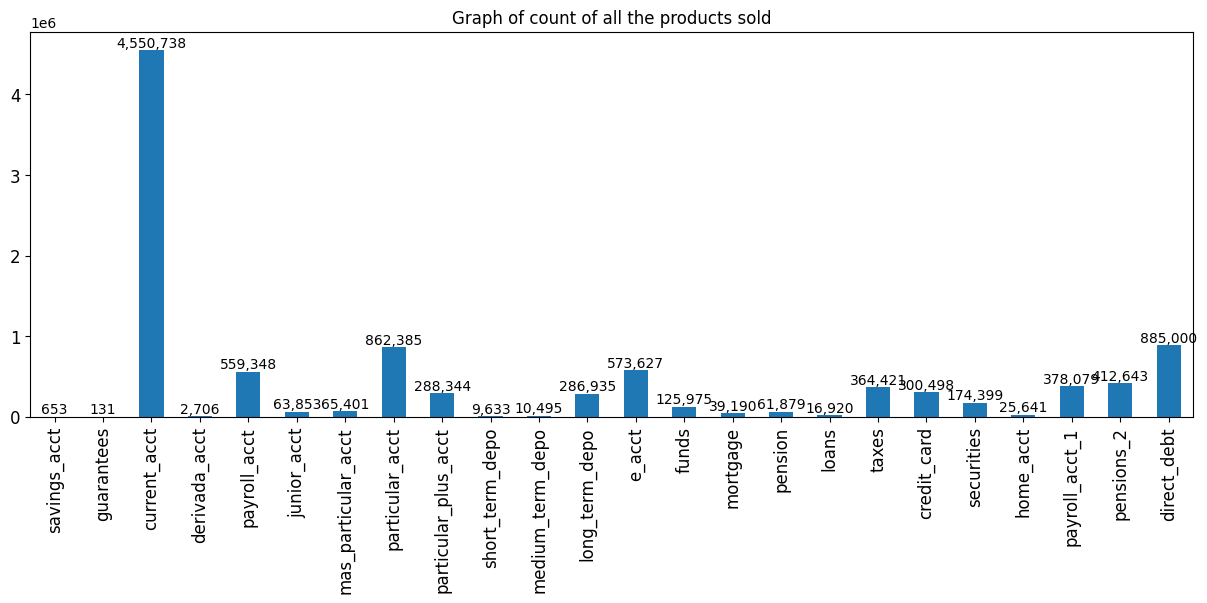

In [55]:
ax = train[products].sum().plot(kind='bar', figsize=(15, 5), fontsize=12)
plt.title('Graph of count of all the products sold')
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
# plt.xticks(rotation = 45)
plt.show()

- Current account, particular, direct debit and e_account are the most popular accounts.
- Savings account, guarentees, derivada account, short and medium term deposits are the least popular accounts